## Задание 6. Класстеризация

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Задача 1. Сгенерировать 3 датасета

метод make_classification - генерирует массивы данных, что являются датасетами </br>
n_samples - количество точек(строк) </br>
n_features - кол-во признаков(столбиков) </br>
n_classes - кол-во классов(2 - значит бинарная, там только 1 или 0) </br>
n_redundant - кол-во бесполезных столбиков, что никак не влияют на модели </br>

In [2]:
df1, df1_y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0, random_state=42)
df2, df2_y = make_classification(n_samples=500, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0, random_state=42)
df3, df3_y = make_classification(n_samples=700, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0, random_state=42)

Задача 2. Визуализация данных

Сначала классификация, потом кластеризация

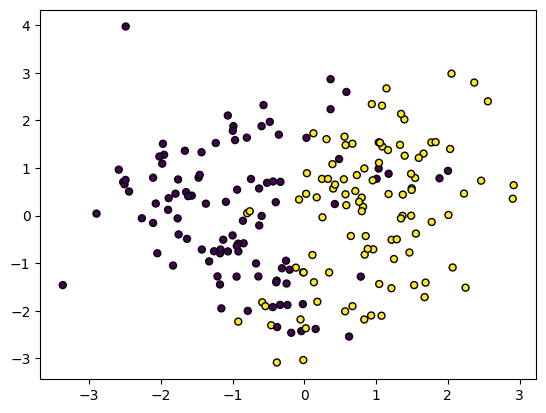

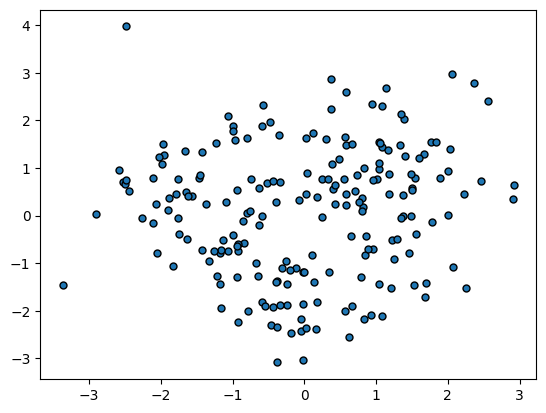

In [3]:
plt.scatter(df1[:, 0], df1[:, 1], marker="o", c=df1_y, s=25, edgecolor="k")
plt.show()
plt.scatter(df1[:, 0], df1[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

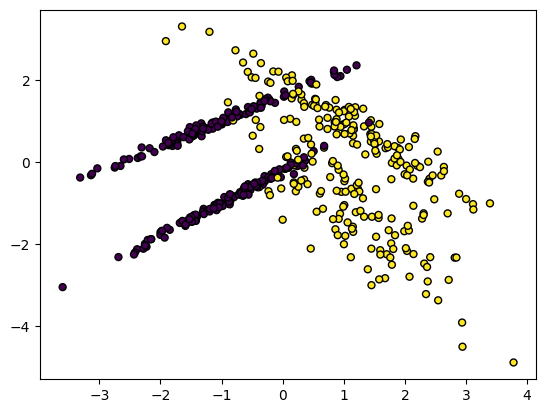

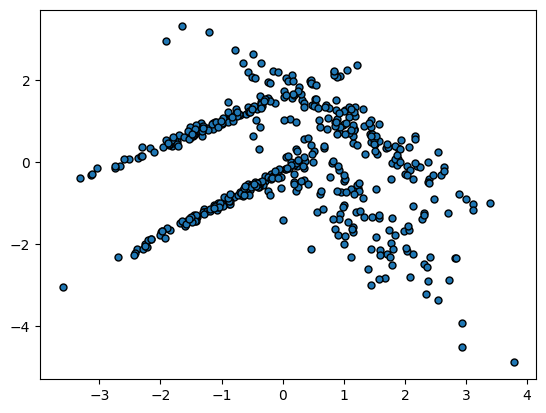

In [4]:
plt.scatter(df2[:, 0], df2[:, 1], marker="o", c=df2_y, s=25, edgecolor="k")
plt.show()
plt.scatter(df2[:, 0], df2[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

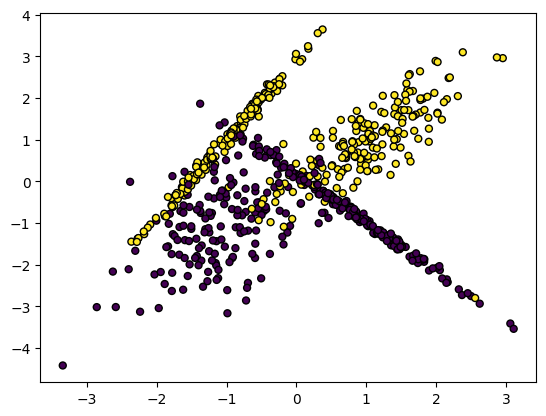

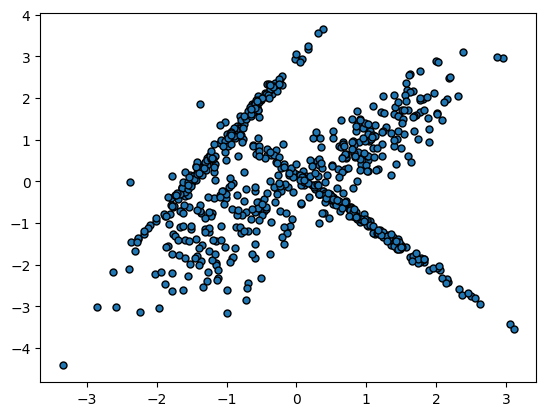

In [5]:
plt.scatter(df3[:, 0], df3[:, 1], marker="o", c=df3_y, s=25, edgecolor="k")
plt.show()
plt.scatter(df3[:, 0], df3[:, 1], marker="o", s=25, edgecolor="k")
plt.show()

Задача 3. Провести класстеризацию

## KMeans

Метод локтя - метод, что помогает нам понять на сколько кластеров хорощо бы разбить данные

In [7]:
from sklearn.cluster import KMeans
inertias = []

for k in range(1, 11):                                      # это for делает перебор кластеров и результат работы модели пихаем в массив
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df1)  # здесь обучаем
    inertias.append(kmeans.inertia_)                        # здесь пихаем результат

c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: Fut

по оси X - кол-ва кластеров, по оси Y - Сумма квадратов расстояний точек до ближайшего к ним центра кластера

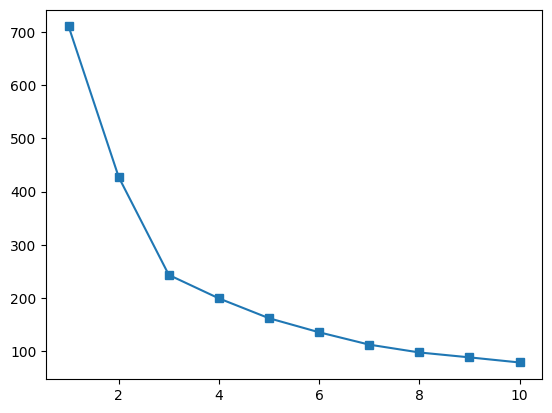

In [8]:
plt.plot(range(1, 11), inertias, marker='s')

Видим, что на 3 виден острый угол => здесь происходит резкое изменение скорости функции.

KMeans - класс, что реализует кластеризацию, используя принцип ближайшего соседа </br>
n_clusters - кол-во кластеров(групп, на которые будут поделены данные)

In [9]:
kmeans = KMeans(n_clusters=3).fit(df1)

c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


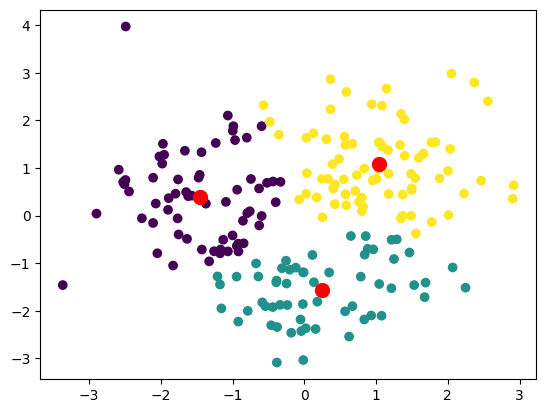

In [10]:
plt.scatter(df1[:,0], df1[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

Здесь проверяются метрики нашей класстеризации

In [11]:
from sklearn.metrics import silhouette_score, rand_score, davies_bouldin_score, jaccard_score

print(silhouette_score(df1, kmeans.labels_))
print(rand_score(kmeans.labels_, df1_y))
print(davies_bouldin_score(df1, kmeans.labels_))

0.43585401477983055
0.6531155778894472
0.7686156499758465


## Иерархическая класстеризация

In [12]:
import scipy.cluster.hierarchy as sch

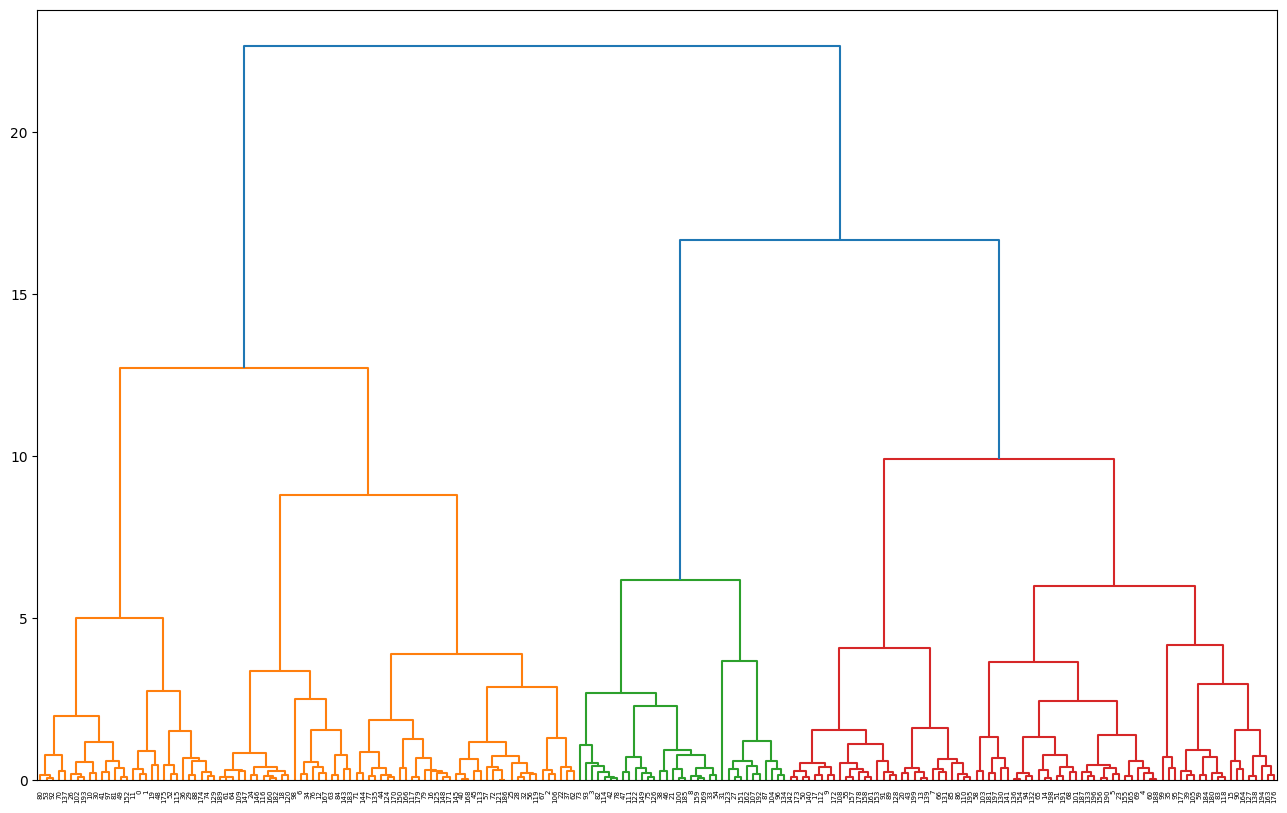

In [13]:
plt.figure(figsize=(16,10))
dend = sch.dendrogram(sch.linkage(df1,method='ward'))

affinity - метод вычисления расстояния между объектами

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc_clusters = hc.fit_predict(df1)

print(silhouette_score(df1, hc_clusters))
print(rand_score(hc_clusters, df1_y))
print(davies_bouldin_score(df1, hc_clusters))

0.3337193420911309
0.5780402010050252
0.8684745254096017


c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## DBSCAN

Метод класстеризации основанный на плотности объектов в пространстве
eps - радиус расстояния объекта до других
min_samples - минимальное кол-во объектов, чтобы выделить класстер

0.24500723225594395
0.4978391959798995
1.1223174452428266


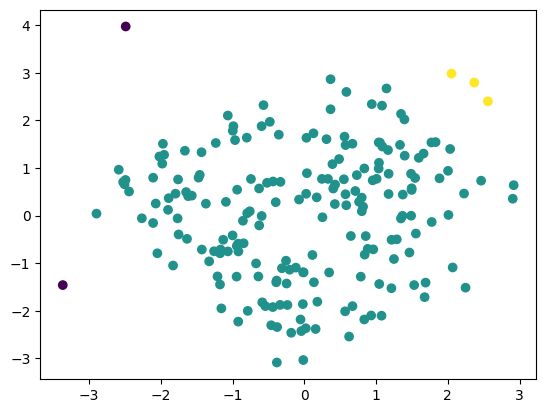

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=3).fit(df1)
print(silhouette_score(df1, dbscan.labels_))
print(rand_score(dbscan.labels_, df1_y))
print(davies_bouldin_score(df1,dbscan.labels_))

plt.scatter(df1[:,0], df1[:,1], c=dbscan.labels_)

## Реализация KMEANS

In [16]:
class MyKMEANs:

    def __init__(self, n_cluster: int, eps = 0.5, max_iteration = 100):
        self.n_cluster = n_cluster
        self._X_train = None
        self.labels_ = []
        self.center_cluster_ = []
        self.eps = eps
        self.max_iteration = max_iteration

    def fit(self, X_train: np.array):

        self._X_train = X_train
        
        clusters = {}
        
        for value in range(self.n_cluster):
            self.center_cluster_.append(list(self._X_train[np.random.randint(1, self._X_train.shape[0])]))                   
            clusters[value] = []
        
        max_iter = 0
        self.center_cluster_ = np.array(self.center_cluster_)
        
        while(max_iter != self.max_iteration):
            self.labels_ = []
            max_iter += 1
            for x_train in self._X_train:
                distances = []
                for center_cluster in self.center_cluster_:
                    distances.append(np.sqrt(np.sum((x_train - center_cluster) ** 2)))
                    
                min_distance = min(distances)
                index_min_distance = distances.index(min_distance)
                
                clusters[index_min_distance].append(x_train)
                self.labels_.append(index_min_distance)
                
            for center_cluster in self.center_cluster_:
                center_cluster = sum(center_cluster) / len(center_cluster)

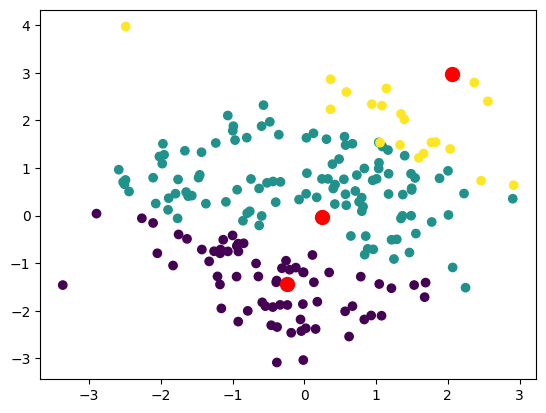

0.25004330273370934
0.5105025125628141
1.2093952293069326


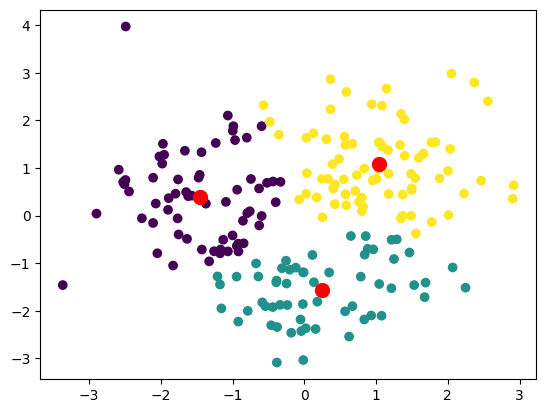

In [17]:
my_kmeans = MyKMEANs(3, eps=0.5)
my_kmeans.fit(df1)
my_kmeans.labels_
plt.scatter(df1[:,0], df1[:,1], c=my_kmeans.labels_)
plt.scatter(my_kmeans.center_cluster_[:,0], my_kmeans.center_cluster_[:,1], s=100, c='red')
plt.show()
plt.scatter(df1[:,0], df1[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

print(silhouette_score(df1, my_kmeans.labels_))
print(rand_score(my_kmeans.labels_, df1_y))
print(davies_bouldin_score(df1, my_kmeans.labels_))

## Проверка класстеризации на датасете из задачи классификации

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

df = pd.read_csv(os.path.join('..', '..', 'data', 'ForUbung', 'neo_task.csv'))

x = lambda x: x.mean() if x.notna().any() else 0
group = df.groupby('miss_distance')['relative_velocity'].transform('mean').iat[0]
df['relative_velocity'].fillna(group, inplace=True)

x = lambda x: x.median() if x.notna().any() else 0
group = df.groupby('est_diameter_min')['absolute_magnitude'].transform(x)
df['absolute_magnitude'].fillna(group, inplace=True)

table = df['est_diameter_max'] - df['est_diameter_min']
df['est_diameter_max'].fillna(df['est_diameter_min'] + table.mean(), inplace=True)

df['name'].fillna('0 unknow', inplace=True)

df['id'].fillna(df['id'].mode()[1], inplace=True)

df.loc[df['absolute_magnitude'] == 0]
df = df.drop(index=df.loc[df['absolute_magnitude'] == 0].index)

dict_patch = {
    False: 0,
    True: 1
}
df['hazardous'] = df['hazardous'].map(dict_patch)

from imblearn.under_sampling import RandomUnderSampler
X = df.drop(['name', 'hazardous', 'est_diameter_max'], axis=1)
Y = df['hazardous']
rus = RandomUnderSampler()

X_resampled, y_resampled = rus.fit_resample(X, Y)

c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: Fut

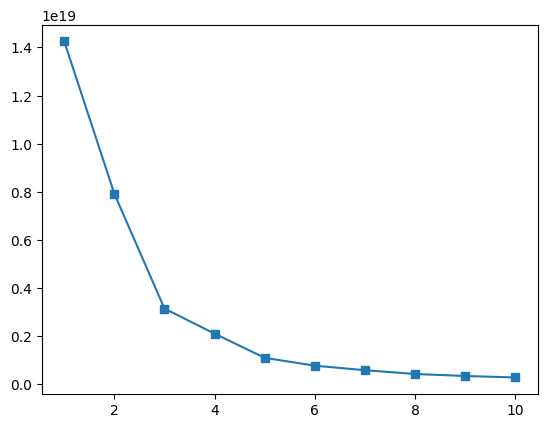

In [19]:
inertias = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_resampled)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertias, marker='s')

In [20]:
kmeans = KMeans(n_clusters=3, random_state=1).fit(X_resampled)

y_pred = kmeans.predict()

print(silhouette_score(X_resampled, kmeans.labels_))
print(rand_score(kmeans.labels_, y_resampled))
print(davies_bouldin_score(X_resampled, kmeans.labels_))

c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6058856497027819
0.5102135839259146
0.5421908207473698


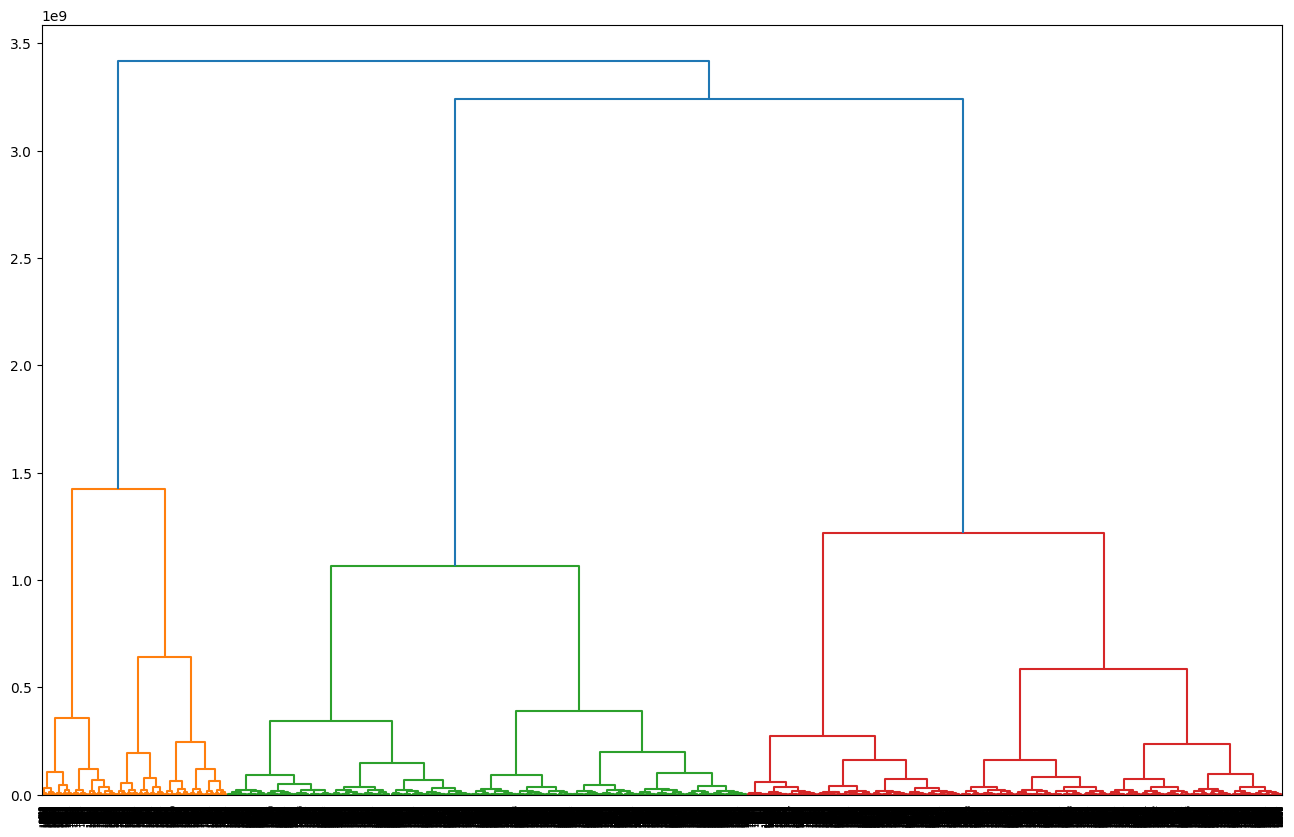

In [21]:
plt.figure(figsize=(16,10))
dend = sch.dendrogram(sch.linkage(X_resampled,method='ward'))

In [22]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc_clusters = hc.fit_predict(X_resampled)

print(silhouette_score(X_resampled, hc_clusters))
print(rand_score(hc_clusters, y_resampled))
print(davies_bouldin_score(X_resampled, hc_clusters))

c:\Users\ktulu\OneDrive\Документы\ML - лабы\venv\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.6025459089602412
0.5100081096804527
0.5484168035343523
